<a href="https://colab.research.google.com/github/Fedryus/Ejercicios-IA/blob/master/Basics1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# BASICOS de PYTHON 

In [0]:
a=12
b=34.678
c="Hola Mundo"


In [17]:
type(a)

int

In [18]:
a+b #Ints y floats son compatibles

46.678

In [19]:
a/b

0.3460407174577542

In [21]:
d=" y hola Marte"
c+d

'Hola Mundo y hola Marte'

In [0]:
#Listas y tuplas->se idexan en 0
tupla=(1,2,3,4) #una tupla no puede ser modificada, es cte
lista=[4,5,6,7,8]

lista[0]
tupla[0]

lista[-1]=14
lista.pop() #borramos el ultimo de la lista
del lista[1] #borrar un elemento de la lista
lista.append(777)

In [32]:
# IF ELSE
a=1
b=5
c=2

if(a<b and a==c):
  print("A es menor a B")
elif(a==b or c==2):
  print("A es igual a B")
else: print("A es mayor a B")

A es igual a B


In [0]:
# KNN para REGRESION, REGRESION y RIDGE

from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge

In [34]:
boston=load_boston()
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(boston.data,boston.target)

In [0]:
knn= KNeighborsRegressor(n_neighbors=5)

In [50]:
knn.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [51]:
knn.score(X_test,Y_test)

0.6205554442197085

In [0]:
del knn

In [0]:
rl=LinearRegression()

In [54]:
rl.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
rl.score(X_test,Y_test)

0.783711171599035

In [0]:
del rl

In [0]:
ridge= Ridge()

In [58]:
ridge.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
ridge.score(X_test,Y_test)

0.78038477122162

In [0]:
# FIN DE KNN para REGRESION, REGRESION y RIDGE

In [0]:
#ARBOLES DE DECISIONES

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
#Para graficar:
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np


In [0]:
iris= load_iris()

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(iris.data,iris.target)

In [0]:
arbol= DecisionTreeClassifier()

In [69]:
arbol.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
arbol.score(X_test,Y_test)

0.9736842105263158

In [73]:
arbol.score(X_train,Y_train) #SOBREAJUSTE

1.0

In [0]:
#Generar archivo .dot cque tiene toda la info de mi arbol
export_graphviz(arbol, out_file='arbol.dot', class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=False, filled=True)

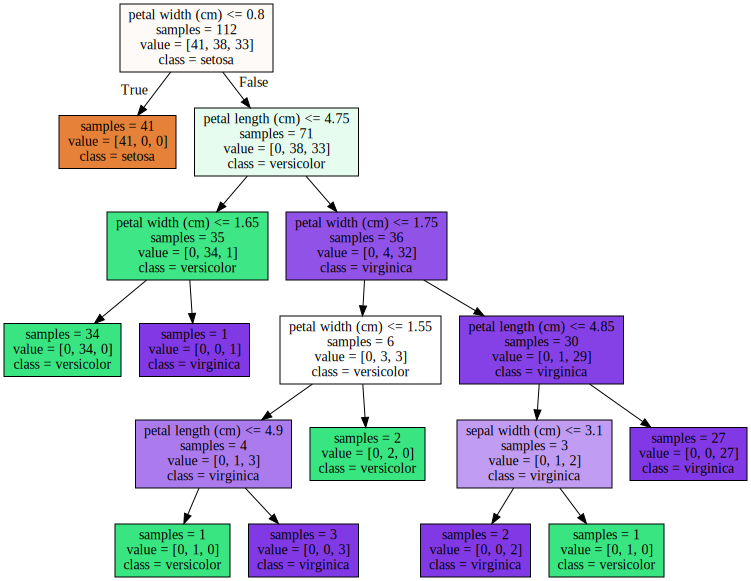

In [85]:
#Graficamos arbol

with open("arbol.dot") as f:
  dot_graph=f.read()
  graphviz.Source(dot_graph)

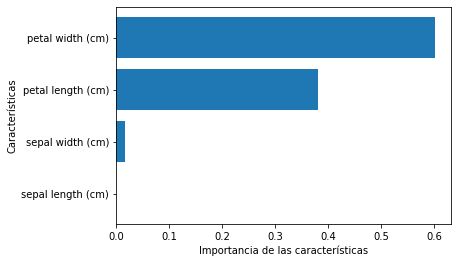

In [87]:
#grafico de barras
caract=iris.data.shape[1]
plt.barh(range(caract),arbol.feature_importances_) #Importancia de las caracteristicas
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()
#Grafica que importancia tiene cada caracteristica para tomar la decision

In [0]:
arbol= DecisionTreeClassifier(max_depth=5) #la profundidad es que tanto de ramifica el arbol


In [95]:
arbol.fit(X_train,Y_train)
arbol.score(X_test,Y_test)

0.9473684210526315

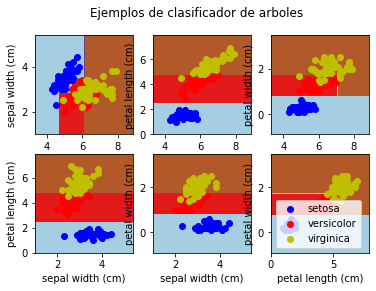

In [100]:
#GRAFICAS PARA SABER COMO CLASIFICO (todo esto es Matplotlib)

n_classes=3
plot_colors='bry'
plot_step=0.02

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
    X=iris.data[:,pair]
    y=iris.target
    
    #entrena algoritmo
    clf=DecisionTreeClassifier(max_depth=3).fit(X,y)
    plt.subplot(2,3,pairidx + 1)
    x_min, x_max=X[:,0].min() - 1, X[:,0].max() +1
    y_min, y_max=X[:,1].min() - 1, X[:,1].max() +1
    xx, yy=np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    cs=plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis('tight')

    #plot puntos de entrenamiento
    for i, color in zip(range(n_classes), plot_colors):
        idx=np.where(y == i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis('tight')

plt.suptitle('Ejemplos de clasificador de arboles')

plt.legend()
plt.show()


In [0]:
#Las rayas finitas (que no aparecen en esta gráfica) son sobreajustes: el modelo esta generandola para solo poder clasificar bien 1 solo elemento con los que fue entrenado
#En el futuro si cae en esa raya un elemento nuevo no le va a atinar